# **Initial Setup**

## Insert scripts path

In [10]:
import sys
sys.path.insert(1,'d:\\DOCS\\my_workspace\\projects_git\\mp_nba_analysis\\data\\scripts')

## Import libraries

In [101]:
import pandas as pd
import numpy as np
import joblib
from extract_functions import manage_data
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
pd.set_option('display.max_columns',100)

# **Load API Data**

In [13]:
df = manage_data(filename='leaguedash',action='load')

In [14]:
df.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,SEASON
0,920,A.C. Green,1.610613e+09,DAL,33.0,6-9,81.0,225,Oregon State,USA,1985,1,23,83,597,656,69,-7.4,0.089,0.184,0.118,0.523,0.045,1996-97
1,761,Matt Geiger,1.610613e+09,CHH,27.0,7-1,85.0,245,Georgia Tech,USA,1992,2,42,49,437,258,38,1.2,0.106,0.158,0.210,0.538,0.065,1996-97
2,900,Matt Fish,1.610613e+09,MIA,27.0,6-11,83.0,235,North Carolina-Wilmington,USA,1992,2,50,6,2,5,0,-35.9,0.100,0.267,0.192,0.333,0.000,1996-97
3,672,Matt Bullard,1.610613e+09,HOU,30.0,6-10,82.0,235,Iowa,USA,Undrafted,Undrafted,Undrafted,71,320,117,67,0.8,0.014,0.101,0.147,0.535,0.099,1996-97
4,55,Marty Conlon,1.610613e+09,BOS,29.0,6-11,83.0,245,Providence,USA,Undrafted,Undrafted,Undrafted,74,574,323,104,-7.5,0.074,0.133,0.164,0.542,0.101,1996-97


In [15]:
df.shape

(12302, 24)

# **Data Wrangling**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12302 entries, 0 to 12301
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PLAYER_ID             12302 non-null  int64  
 1   PLAYER_NAME           12301 non-null  object 
 2   TEAM_ID               12301 non-null  float64
 3   TEAM_ABBREVIATION     12301 non-null  object 
 4   AGE                   12301 non-null  float64
 5   PLAYER_HEIGHT         12230 non-null  object 
 6   PLAYER_HEIGHT_INCHES  12230 non-null  float64
 7   PLAYER_WEIGHT         12295 non-null  object 
 8   COLLEGE               12302 non-null  object 
 9   COUNTRY               12301 non-null  object 
 10  DRAFT_YEAR            12302 non-null  object 
 11  DRAFT_ROUND           12222 non-null  object 
 12  DRAFT_NUMBER          12214 non-null  object 
 13  GP                    12302 non-null  int64  
 14  PTS                   12302 non-null  int64  
 15  REB                

## Deal with null values

In [17]:
df.isnull().sum()

PLAYER_ID                0
PLAYER_NAME              1
TEAM_ID                  1
TEAM_ABBREVIATION        1
AGE                      1
PLAYER_HEIGHT           72
PLAYER_HEIGHT_INCHES    72
PLAYER_WEIGHT            7
COLLEGE                  0
COUNTRY                  1
DRAFT_YEAR               0
DRAFT_ROUND             80
DRAFT_NUMBER            88
GP                       0
PTS                      0
REB                      0
AST                      0
NET_RATING               0
OREB_PCT                 0
DREB_PCT                 0
USG_PCT                  0
TS_PCT                   0
AST_PCT                  0
SEASON                   0
dtype: int64

In [18]:
df[df.DRAFT_ROUND.isnull()].iloc[:,5:]

,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,SEASON
375,6-10,82.0,245,Georgia Tech,USA,1994,None,None,72,100,204,24,1.5,0.088,0.160,0.082,0.439,0.042,1996-97
401,6-7,79.0,240,Clemson,USA,1995,None,None,6,18,14,2,-41.5,0.100,0.211,0.252,0.319,0.071,1996-97
431,6-4,76.0,190,Washington,USA,1992,None,None,71,405,115,94,-1.3,0.031,0.067,0.165,0.539,0.141,1996-97
629,6-8,80.0,195,Kentucky,USA,1998,None,None,8,6,6,1,5.0,0.136,0.150,0.148,0.500,0.056,1997-98
817,6-10,82.0,245,Georgia Tech,USA,1994,None,None,28,58,69,9,-5.6,0.089,0.181,0.149,0.413,0.060,1997-98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,6-2,74.0,183,Princeton,USA,2019,None,None,5,50,6,10,-2.6,0.006,0.032,0.156,0.531,0.102,2021-22
11717,6-3,75.0,195,Houston,USA,2019,None,None,54,288,103,62,-3.8,0.021,0.097,0.159,0.483,0.105,2021-22
11743,6-2,74.0,174,Old Dominion,USA,2019,None,None,1,2,0,0,133.3,0.000,0.000,0.500,1.000,0.000,2021-22
11776,6-1,73.0,173,North Carolina State,USA,2016,None,None,3,0,3,3,34.6,0.091,0.286,0.219,0.000,0.200,2021-22


In [19]:
df[df.PLAYER_HEIGHT.isnull()]

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,SEASON
179,199,Reggie Williams,1.610613e+09,NJN,33.0,None,NaN,None,Georgetown,USA,1987,1,4,13,76,31,10,-12.9,0.022,0.124,0.190,0.468,0.093,1996-97
882,1823,None,NaN,None,NaN,None,NaN,None,None,None,Undrafted,Undrafted,Undrafted,4,5,5,1,-8.8,0.100,0.111,0.115,0.434,0.050,1998-99
888,698,Eddie Johnson,1.610613e+09,HOU,40.0,None,NaN,,Illinois,USA,1981,2,29,3,12,2,1,-11.9,0.000,0.125,0.288,0.462,0.063,1998-99
1775,1564,Etdrick Bohannon,1.610613e+09,CLE,28.0,None,NaN,,Auburn-Montgomery,USA,Undrafted,Undrafted,Undrafted,6,8,7,0,13.5,0.176,0.222,0.156,0.694,0.000,2000-01
1781,202,Gary Grant,1.610613e+09,POR,36.0,None,NaN,,Michigan,USA,1988,1,15,4,10,0,1,3.7,0.000,0.000,0.179,0.714,0.100,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8155,202343,Elliot Williams,1.610613e+09,PHI,26.0,None,NaN,None,Memphis,USA,2010,1,22,13,37,8,12,5.5,0.000,0.065,0.162,0.477,0.150,2014-15
8172,202399,Jeff Adrien,1.610613e+09,HOU,29.0,None,NaN,None,Connecticut,USA,Undrafted,Undrafted,Undrafted,17,60,77,15,-1.6,0.091,0.244,0.134,0.494,0.104,2014-15
8184,203968,Jerrelle Benimon,1.610613e+09,DEN,23.0,None,NaN,None,Towson,USA,Undrafted,Undrafted,Undrafted,2,0,3,0,100.0,1.000,0.400,0.143,0.000,0.000,2014-15
8385,203565,Patrick Christopher,1.610613e+09,MEM,27.0,None,NaN,None,California,USA,Undrafted,Undrafted,Undrafted,4,6,6,0,-27.8,0.071,0.154,0.203,0.250,0.000,2014-15


In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

PLAYER_ID               0
PLAYER_NAME             0
TEAM_ID                 0
TEAM_ABBREVIATION       0
AGE                     0
PLAYER_HEIGHT           0
PLAYER_HEIGHT_INCHES    0
PLAYER_WEIGHT           0
COLLEGE                 0
COUNTRY                 0
DRAFT_YEAR              0
DRAFT_ROUND             0
DRAFT_NUMBER            0
GP                      0
PTS                     0
REB                     0
AST                     0
NET_RATING              0
OREB_PCT                0
DREB_PCT                0
USG_PCT                 0
TS_PCT                  0
AST_PCT                 0
SEASON                  0
dtype: int64

## Change object-type columns with numbers to float

In [22]:
df.PLAYER_WEIGHT = df.PLAYER_WEIGHT.astype('float')
df.AGE = df.AGE.astype('int')

In [23]:
df.shape

(12144, 24)

In [24]:
df.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,SEASON
0,920,A.C. Green,1.610613e+09,DAL,33,6-9,81.0,225.0,Oregon State,USA,1985,1,23,83,597,656,69,-7.4,0.089,0.184,0.118,0.523,0.045,1996-97
1,761,Matt Geiger,1.610613e+09,CHH,27,7-1,85.0,245.0,Georgia Tech,USA,1992,2,42,49,437,258,38,1.2,0.106,0.158,0.210,0.538,0.065,1996-97
2,900,Matt Fish,1.610613e+09,MIA,27,6-11,83.0,235.0,North Carolina-Wilmington,USA,1992,2,50,6,2,5,0,-35.9,0.100,0.267,0.192,0.333,0.000,1996-97
3,672,Matt Bullard,1.610613e+09,HOU,30,6-10,82.0,235.0,Iowa,USA,Undrafted,Undrafted,Undrafted,71,320,117,67,0.8,0.014,0.101,0.147,0.535,0.099,1996-97
4,55,Marty Conlon,1.610613e+09,BOS,29,6-11,83.0,245.0,Providence,USA,Undrafted,Undrafted,Undrafted,74,574,323,104,-7.5,0.074,0.133,0.164,0.542,0.101,1996-97


In [25]:
df.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE',
       'PLAYER_HEIGHT', 'PLAYER_HEIGHT_INCHES', 'PLAYER_WEIGHT', 'COLLEGE',
       'COUNTRY', 'DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER', 'GP', 'PTS',
       'REB', 'AST', 'NET_RATING', 'OREB_PCT', 'DREB_PCT', 'USG_PCT', 'TS_PCT',
       'AST_PCT', 'SEASON'],
      dtype='object')

## Drop unnecessary columns

In [26]:
df.drop(columns=['TEAM_ID','PLAYER_HEIGHT'], inplace=True)

In [27]:
df.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,SEASON
0,920,A.C. Green,DAL,33,81.0,225.0,Oregon State,USA,1985,1,23,83,597,656,69,-7.4,0.089,0.184,0.118,0.523,0.045,1996-97
1,761,Matt Geiger,CHH,27,85.0,245.0,Georgia Tech,USA,1992,2,42,49,437,258,38,1.2,0.106,0.158,0.210,0.538,0.065,1996-97
2,900,Matt Fish,MIA,27,83.0,235.0,North Carolina-Wilmington,USA,1992,2,50,6,2,5,0,-35.9,0.100,0.267,0.192,0.333,0.000,1996-97
3,672,Matt Bullard,HOU,30,82.0,235.0,Iowa,USA,Undrafted,Undrafted,Undrafted,71,320,117,67,0.8,0.014,0.101,0.147,0.535,0.099,1996-97
4,55,Marty Conlon,BOS,29,83.0,245.0,Providence,USA,Undrafted,Undrafted,Undrafted,74,574,323,104,-7.5,0.074,0.133,0.164,0.542,0.101,1996-97


## Change lenght and mass metrics 

In [28]:
# 1 in = 0.025 m
# 1 lb = 0.453 kg

df.PLAYER_HEIGHT_INCHES = df.PLAYER_HEIGHT_INCHES * 0.025
df.rename({'PLAYER_HEIGHT_INCHES':'PLAYER_HEIGHT_METERS'}, axis=1, inplace=True)

df.PLAYER_WEIGHT = df.PLAYER_WEIGHT * 0.453
df.rename({'PLAYER_WEIGHT':'PLAYER_WEIGHT_KG'}, axis=1, inplace=True)

In [29]:
df.loc[:,'PLAYER_HEIGHT_METERS':'PLAYER_WEIGHT_KG']

,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG
0,2.025,101.925
1,2.125,110.985
2,2.075,106.455
3,2.050,106.455
4,2.075,110.985
...,...,...
12297,1.975,89.241
12298,1.875,86.523
12299,1.950,97.395
12300,1.925,89.241


## Create a second dataframe with group by players

In [34]:
df.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE',
       'PLAYER_HEIGHT_METERS', 'PLAYER_WEIGHT_KG', 'COLLEGE', 'COUNTRY',
       'DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER', 'GP', 'PTS', 'REB', 'AST',
       'NET_RATING', 'OREB_PCT', 'DREB_PCT', 'USG_PCT', 'TS_PCT', 'AST_PCT',
       'SEASON'],
      dtype='object')

In [36]:
df_players = df[['PLAYER_ID',
                'PLAYER_NAME',
                'PLAYER_HEIGHT_METERS',
                'PLAYER_WEIGHT_KG',
                'GP',
                'PTS',
                'REB',
                'AST',
                'NET_RATING',
                'OREB_PCT',
                'DREB_PCT',
                'USG_PCT',
                'TS_PCT',
                'AST_PCT']].groupby('PLAYER_ID').agg({
                'PLAYER_NAME':'first',
                'PLAYER_HEIGHT_METERS':'median',
                'PLAYER_WEIGHT_KG':'median',
                'GP':'median',
                'PTS':'median',
                'REB':'median',
                'AST':'median',
                'NET_RATING':'median',
                'OREB_PCT':'median',
                'DREB_PCT':'median',
                'USG_PCT':'median',
                'TS_PCT':'median',
                'AST_PCT':'median'
                })

In [37]:
df_players.head()

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT
PLAYER_ID,,,,,,,,,,,,,
2,Byron Scott,1.900,92.865,79.0,526.0,118.0,99.0,5.9,0.015,0.065,0.150,0.590,0.110
3,Grant Long,2.025,112.344,50.0,326.0,231.0,43.0,-2.4,0.074,0.132,0.132,0.510,0.078
7,Dan Schayes,2.075,117.780,45.0,133.0,125.0,14.0,0.3,0.077,0.126,0.147,0.465,0.045
9,Sedale Threatt,1.850,83.805,21.0,70.0,24.0,40.0,-4.5,0.015,0.056,0.121,0.451,0.185
12,Chris King,2.000,97.395,8.0,4.0,11.0,1.0,-18.5,0.025,0.217,0.138,0.228,0.048


## Performance manipulation

In [49]:
df_players.columns

Index(['PLAYER_NAME', 'PLAYER_HEIGHT_METERS', 'PLAYER_WEIGHT_KG', 'GP', 'PTS',
       'REB', 'AST', 'NET_RATING', 'OREB_PCT', 'DREB_PCT', 'USG_PCT', 'TS_PCT',
       'AST_PCT'],
      dtype='object')

In [50]:
df_players.columns[-9:]

Index(['PTS', 'REB', 'AST', 'NET_RATING', 'OREB_PCT', 'DREB_PCT', 'USG_PCT',
       'TS_PCT', 'AST_PCT'],
      dtype='object')

In [52]:
df_players.head()

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT
PLAYER_ID,,,,,,,,,,,,,
2,Byron Scott,1.900,92.865,79.0,526.0,118.0,99.0,5.9,0.015,0.065,0.150,0.590,0.110
3,Grant Long,2.025,112.344,50.0,326.0,231.0,43.0,-2.4,0.074,0.132,0.132,0.510,0.078
7,Dan Schayes,2.075,117.780,45.0,133.0,125.0,14.0,0.3,0.077,0.126,0.147,0.465,0.045
9,Sedale Threatt,1.850,83.805,21.0,70.0,24.0,40.0,-4.5,0.015,0.056,0.121,0.451,0.185
12,Chris King,2.000,97.395,8.0,4.0,11.0,1.0,-18.5,0.025,0.217,0.138,0.228,0.048


### Performance normalization

In [63]:
scaler = MinMaxScaler().set_output(transform='pandas')

In [64]:
df_players_norm = scaler.fit_transform(df_players.iloc[:,-9:])

In [65]:
type(df_players_norm)

pandas.core.frame.DataFrame

In [66]:
df_players_norm

,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT
PLAYER_ID,,,,,,,,,
2,0.263197,0.110177,0.146018,0.643965,0.030,0.065,0.300,0.456303,0.164918
3,0.163122,0.215686,0.063422,0.612561,0.148,0.132,0.264,0.394432,0.116942
7,0.066550,0.116713,0.020649,0.622777,0.154,0.126,0.294,0.359629,0.067466
9,0.035026,0.022409,0.058997,0.604616,0.030,0.056,0.242,0.348801,0.277361
12,0.002002,0.010271,0.001475,0.551646,0.050,0.217,0.276,0.176334,0.071964
...,...,...,...,...,...,...,...,...,...
1631298,0.006005,0.006536,0.000000,0.453273,0.128,0.118,0.270,0.344934,0.000000
1631306,0.004503,0.006536,0.005900,0.611805,0.050,0.176,0.194,0.386698,0.176912
1631309,0.003002,0.000000,0.004425,0.641695,0.000,0.000,0.200,1.000000,0.899550


In [69]:
df_players.iloc[:,:4]

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP
PLAYER_ID,,,,
2,Byron Scott,1.900,92.865,79.0
3,Grant Long,2.025,112.344,50.0
7,Dan Schayes,2.075,117.780,45.0
9,Sedale Threatt,1.850,83.805,21.0
12,Chris King,2.000,97.395,8.0
...,...,...,...,...
1631298,Jack White,1.975,101.925,12.0
1631306,Cole Swider,2.025,99.660,5.0
1631309,Trevor Hudgins,1.800,81.540,2.0


In [70]:
df_players_norm = pd.concat([df_players.iloc[:,:4],df_players_norm], axis=1)

In [71]:
df_players_norm.head()

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT
PLAYER_ID,,,,,,,,,,,,,
2,Byron Scott,1.900,92.865,79.0,0.263197,0.110177,0.146018,0.643965,0.030,0.065,0.300,0.456303,0.164918
3,Grant Long,2.025,112.344,50.0,0.163122,0.215686,0.063422,0.612561,0.148,0.132,0.264,0.394432,0.116942
7,Dan Schayes,2.075,117.780,45.0,0.066550,0.116713,0.020649,0.622777,0.154,0.126,0.294,0.359629,0.067466
9,Sedale Threatt,1.850,83.805,21.0,0.035026,0.022409,0.058997,0.604616,0.030,0.056,0.242,0.348801,0.277361
12,Chris King,2.000,97.395,8.0,0.002002,0.010271,0.001475,0.551646,0.050,0.217,0.276,0.176334,0.071964


### Performance aggregation

In [80]:
df_players_norm.iloc[:,-9:].mean(axis=1)

PLAYER_ID
2          0.242175
3          0.234463
7          0.203087
9          0.186135
12         0.150743
             ...   
1631298    0.147416
1631306    0.179150
1631309    0.305408
1631320    0.228083
1631323    0.184781
Length: 2449, dtype: float64

In [81]:
# All stats - 'PTS', 'REB', 'AST', 'NET_RATING', 'OREB_PCT', 'DREB_PCT', 'USG_PCT', 'TS_PCT', 'AST_PCT'
df_players_norm['OVERALL_RATING'] = df_players_norm.iloc[:,-9:].mean(axis=1)

# 'PTS', 'AST', 'NET_RATING', 'USG_PCT', 'TS_PCT', 'AST_PCT'
df_players_norm['OVERALL_OFF'] = df_players_norm[['PTS', 'AST', 'NET_RATING', 'USG_PCT', 'TS_PCT', 'AST_PCT']].mean(axis=1)

# 'REB', 'OREB_PCT', 'DREB_PCT'
df_players_norm['OVERALL_DEF'] = df_players_norm[['REB', 'OREB_PCT', 'DREB_PCT']].mean(axis=1)

In [94]:
df_players_norm[df_players_norm.PLAYER_NAME == 'Tim Duncan']

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,OVERALL_RATING,OVERALL_OFF,OVERALL_DEF
PLAYER_ID,,,,,,,,,,,,,,,,
1495,Tim Duncan,2.075,117.78,76.0,0.725544,0.746965,0.330383,0.656451,0.178,0.238,0.552,0.422274,0.229385,0.453223,0.486006,0.387655


In [95]:
df_players_norm[df_players_norm.PLAYER_NAME == 'Kobe Bryant']

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,OVERALL_RATING,OVERALL_OFF,OVERALL_DEF
PLAYER_ID,,,,,,,,,,,,,,,,
977,Kobe Bryant,1.95,95.13,72.0,0.939955,0.369281,0.514749,0.637344,0.062,0.1115,0.625,0.424207,0.354573,0.448734,0.582638,0.180927


In [97]:
df_players_norm[df_players_norm.PLAYER_NAME == 'Trae Young']

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,OVERALL_RATING,OVERALL_OFF,OVERALL_DEF
PLAYER_ID,,,,,,,,,,,,,,,,
1629027,Trae Young,1.825,81.54,63.0,0.797598,0.238095,0.876106,0.625804,0.038,0.091,0.64,0.45553,0.634183,0.48848,0.671537,0.122365


In [98]:
df_players_norm[df_players_norm.PLAYER_NAME == 'Stephen Curry']

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,OVERALL_RATING,OVERALL_OFF,OVERALL_DEF
PLAYER_ID,,,,,,,,,,,,,,,,
201939,Stephen Curry,1.875,83.805,74.0,0.89367,0.312792,0.637168,0.642073,0.04,0.106,0.572,0.471771,0.430285,0.456196,0.607828,0.152931


In [99]:
df_players_norm[df_players_norm.PLAYER_NAME == 'Will Barton']

,PLAYER_NAME,PLAYER_HEIGHT_METERS,PLAYER_WEIGHT_KG,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,OVERALL_RATING,OVERALL_OFF,OVERALL_DEF
PLAYER_ID,,,,,,,,,,,,,,,,
203115,Will Barton,1.95,80.634,58.0,0.301476,0.198413,0.224926,0.616913,0.05,0.133,0.395,0.402166,0.221889,0.282642,0.360395,0.127138


# **Data Exploration**

## Games played analysis

In [124]:
df_players_norm[['GP']].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
GP,2449.0,40.476317,23.849633,1.0,1.0,6.0,18.0,43.0,62.0,71.0,80.0,82.0


In [106]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", palette='dark', rc=custom_params)

In [128]:
def plot_distribution(df,var,title,xlabel,ylabel):
    ax = sns.histplot(df[var], kde=True)
    ax.figure.set_size_inches(12,6)
    ax.set_title(title, loc='left', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax=ax

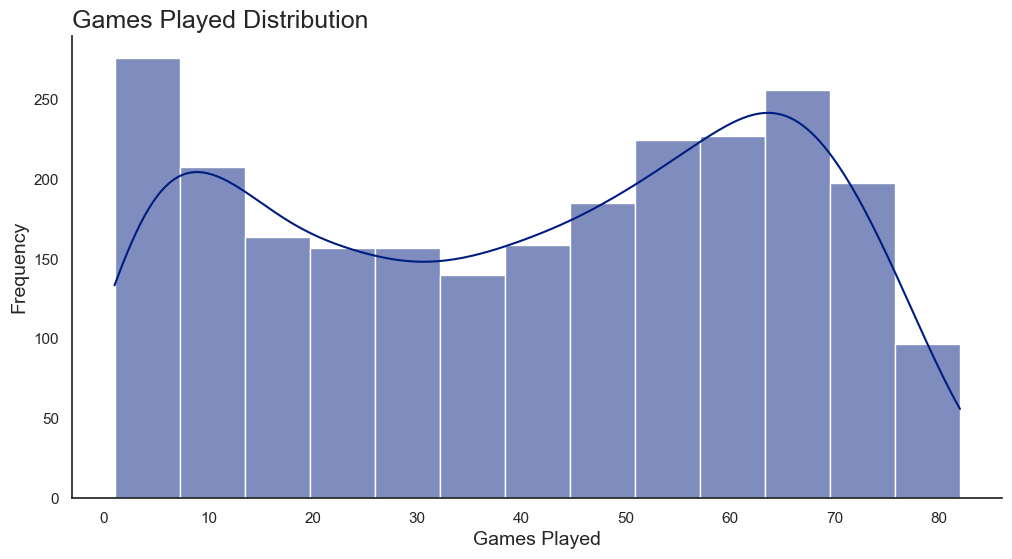

In [129]:
plot_distribution(df_players_norm,'GP','Games Played Distribution', 'Games Played','Frequency')

In [130]:
df_players_norm_above20GP = df_players_norm.query('GP >= 20')

In [131]:
df_players_norm_above20GP[['GP']].describe().T

,count,mean,std,min,25%,50%,75%,max
GP,1801.0,51.772904,16.743591,20.0,38.0,54.0,66.0,82.0


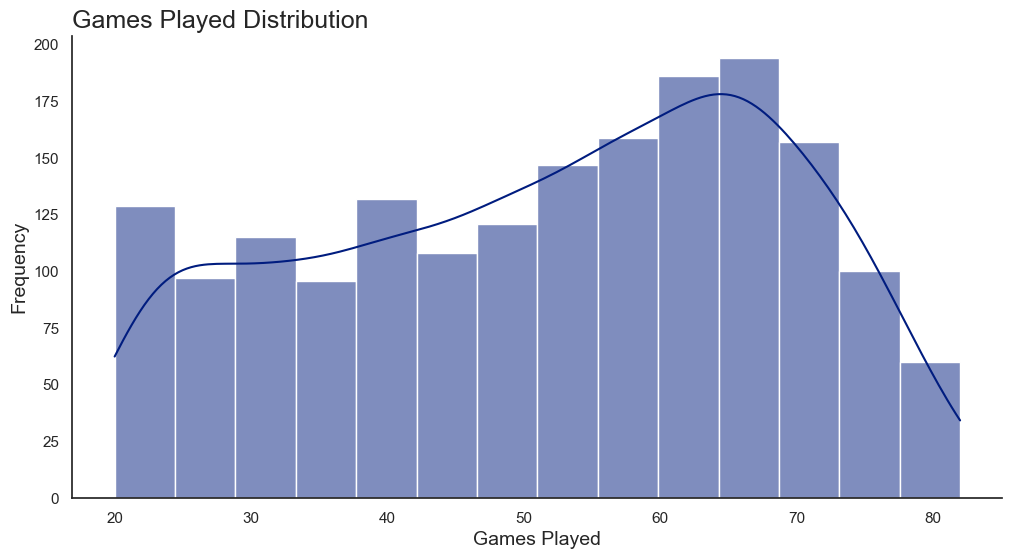

In [132]:
plot_distribution(df_players_norm_above20GP,'GP','Games Played Distribution', 'Games Played','Frequency')

## Height analysis

In [133]:
df_players_norm[['PLAYER_HEIGHT_METERS']].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
PLAYER_HEIGHT_METERS,2449.0,1.970442,0.089627,1.575,1.775,1.85,1.9,1.975,2.0375,2.075,2.15,2.275


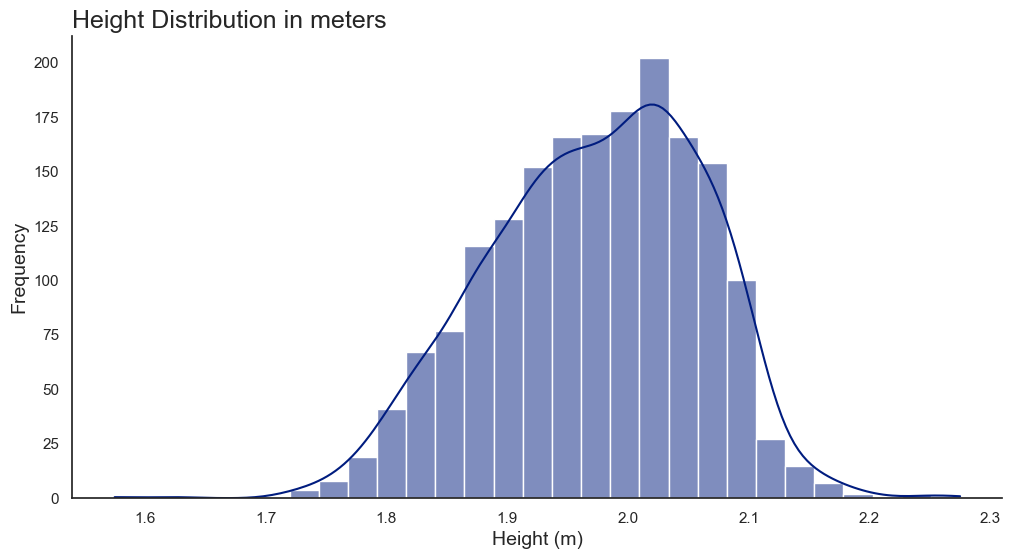

In [134]:
plot_distribution(df_players_norm_above20GP,'PLAYER_HEIGHT_METERS','Height Distribution in meters', 'Height (m)','Frequency')

## Weight analysis

In [135]:
df_players_norm[['PLAYER_WEIGHT_KG']].describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
PLAYER_WEIGHT_KG,2449.0,99.386332,12.476181,60.249,74.745,83.805,90.6,99.207,108.72,115.515,129.105,163.08


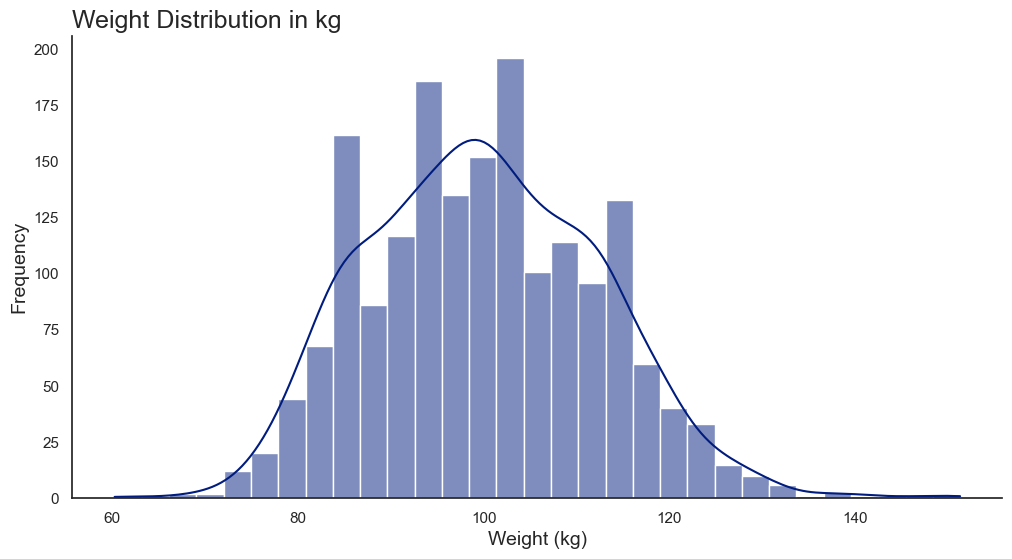

In [136]:
plot_distribution(df_players_norm_above20GP,'PLAYER_WEIGHT_KG','Weight Distribution in kg', 'Weight (kg)','Frequency')

## Analysis 1 - OFF_OVERALL

### Height Distribution

In [ ]:
def plot_(df,var,title,xlabel,ylabel):
    ax = sns.histplot(df[var], kde=True)
    ax.figure.set_size_inches(12,6)
    ax.set_title(title, loc='left', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax=ax

### Weight Distribution

## Analysis 2 - DEF_OVERALL

## Analysis 3 - OVERALL_RATING